In [342]:
import numpy as np
import random as rand
import csv
import matplotlib.pyplot as mp

xval = [[rand.randint(0, 101) for _ in range(20)] for _ in range(100)]
xvalflat = [item for sublist in xval for item in sublist]#attains x vectors

yval = [round(rand.gauss(x, standev_length)) for sublist in xval for x in sublist]

with open("C:\\Users\\Ayman\\Documents\\machinelearning\\hw2\\randomxandy.csv", 'w', newline='') as file:#writes x and y into a csv file
    writer = csv.writer(file)
    for x, y in zip(xvalflat, yval):
        writer.writerow([x, y])
print(xval,yval)




[[99, 59, 43, 38, 65, 74, 41, 58, 48, 73, 26, 5, 76, 92, 54, 80, 26, 28, 91, 30], [57, 51, 76, 73, 1, 99, 47, 52, 46, 57, 78, 95, 47, 72, 77, 1, 78, 44, 101, 49], [67, 61, 55, 27, 60, 58, 10, 27, 6, 87, 38, 54, 5, 29, 63, 96, 98, 75, 73, 28], [14, 97, 14, 31, 48, 71, 99, 59, 62, 12, 1, 49, 78, 90, 4, 24, 61, 38, 43, 15], [38, 19, 30, 80, 36, 48, 18, 92, 81, 88, 43, 47, 67, 80, 85, 36, 45, 28, 17, 3], [52, 82, 25, 75, 72, 24, 17, 100, 2, 85, 69, 75, 98, 58, 99, 91, 27, 67, 51, 44], [11, 39, 23, 59, 39, 93, 55, 61, 90, 36, 75, 99, 47, 7, 88, 93, 76, 7, 58, 77], [64, 4, 30, 5, 50, 51, 89, 94, 59, 85, 22, 31, 47, 60, 17, 43, 38, 81, 91, 5], [41, 90, 85, 99, 92, 30, 17, 91, 38, 45, 30, 9, 39, 21, 14, 48, 1, 55, 18, 23], [22, 28, 100, 89, 72, 22, 19, 89, 9, 2, 38, 72, 34, 14, 43, 5, 36, 28, 25, 18], [81, 54, 85, 16, 39, 90, 94, 17, 7, 83, 51, 75, 94, 78, 85, 38, 83, 80, 14, 14], [23, 51, 14, 42, 78, 68, 54, 2, 4, 43, 6, 53, 68, 25, 82, 27, 34, 69, 70, 92], [1, 5, 37, 18, 64, 17, 67, 27, 8, 3

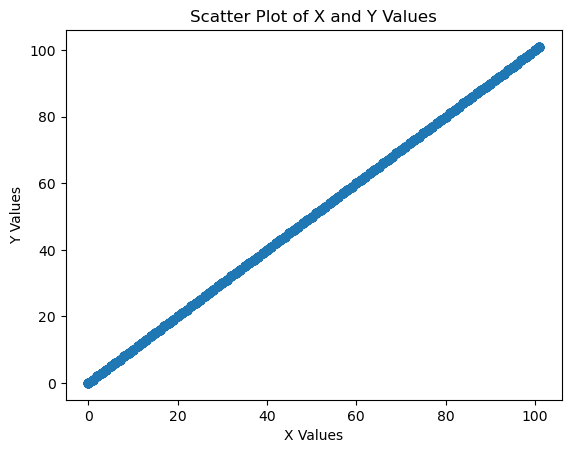

In [335]:
mp.scatter(xvalflat, yval)
mp.xlabel('X Values')
mp.ylabel('Y Values')
mp.title('Scatter Plot of X and Y Values')
mp.show()

In [343]:
data = []
with open('randomxandy.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:#load data from csv file created
        data.append(row)


xvals = [list(map(int, row[0].split(','))) for row in data]
yvals = list(map(int, data[0][1].split(',')))

xvalflat = [item for sublist in xvals for item in sublist] #convert x data to get a 1d array

X = np.array(xvalflat)
y = np.array(yvals)

lossthreshold = 0.01 #lossthreshold to know when to stop the model
m = 0
b = 0
learning_rate = 0.0001
previousm = []
previousb = []
def lossrates(y, y_pred):#calcs the mean squared and returns it
    return np.mean((y - y_pred)**2)
def gradientdescent(X, y, m, b, learning_rate):#calculates the m and b based on the gradient and returns the new ones
    y_pred = m * X + b
    m -= learning_rate * (-2 / len(X)) * np.sum(X * (y - y_pred))
    b -= learning_rate * (-2 / len(X)) * np.sum(y - y_pred)
    previousm.append(m)
    previousb.append(b)
    return m, b

iteration = 0
while True:
    y_pred = m * X + b #predicted vals
    
    loss = lossrates(y, y_pred)
    m, b = gradientdescent(X, y, m, b, learning_rate) #upadet m and b based on the gradient descent function
    #print(m, b)
    if loss < lossthreshold: #if loss is below the threshold end the model
        break
    
    iteration += 1
    
    
print(f"Final Slope: {m}")
print(f"Final Intercept: {b}")
print(f"Final Linear Regression Line: y = {m} * x + {b}")





Final Slope: 0.0029335980368052086
Final Intercept: 98.80095835472432
Final Linear Regression Line: y = 0.0029335980368052086 * x + 98.80095835472432


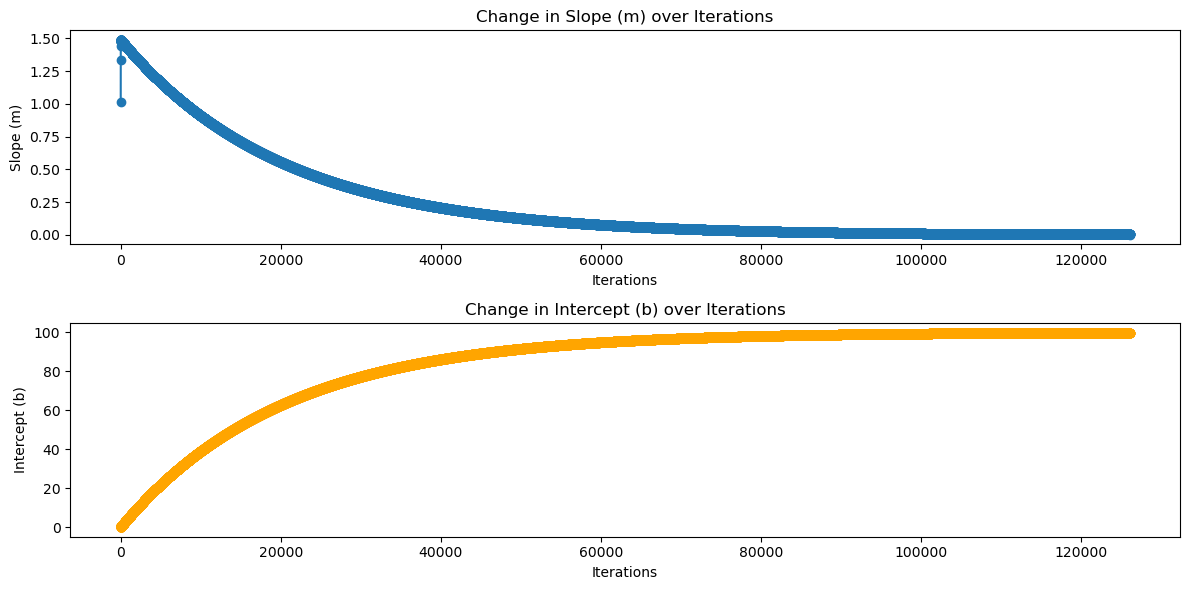

In [338]:
mp.figure(figsize=(12, 6))

mp.subplot(2, 1, 1)
mp.plot(range(iteration + 1), previousm, marker='o', linestyle='-')#plotting for slope
mp.xlabel('Iterations')
mp.ylabel('Slope (m)')
mp.title('Change in Slope (m) over Iterations')

mp.subplot(2, 1, 2)
mp.plot(range(iteration + 1), previousb, marker='o', linestyle='-', color='orange')#plotting for b
mp.xlabel('Iterations')
mp.ylabel('Intercept (b)')
mp.title('Change in Intercept (b) over Iterations')

mp.tight_layout()
mp.show()

